# Setup

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use('dark_background')
import sys
sys.path.insert(1, '/home/mauricio/code/mcr')
from mcr.util import glimpse, plot_value_counts, plot_value_counts_timeseries, missing_report, plot_missing, plot_unique, plot_duplicates, size

from pyspark import SparkContext
sc = SparkContext.getOrCreate()
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

from pyspark.sql import functions as F
from pyspark.sql.types import *

23/05/02 19:27:28 WARN Utils: Your hostname, rig resolves to a loopback address: 127.0.1.1; using 192.168.0.102 instead (on interface enp6s0)
23/05/02 19:27:28 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/05/02 19:27:28 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
# Define a new schema using the StructType method
schema = StructType(
    [
        StructField("No.", LongType(), True),
        StructField("MLSID", StringType(), True),
        StructField("StreetNumberNumeric", LongType(), True),
        StructField("streetaddress", StringType(), True),
        StructField("STREETNAME", StringType(), True),
        StructField("PostalCode", LongType(), True),
        StructField("StateOrProvince", StringType(), True),
        StructField("City", StringType(), True),
        StructField("SalesClosePrice", LongType(), True),
        StructField("LISTDATE", DateType(), True),
        StructField("LISTPRICE", LongType(), True),
        StructField("LISTTYPE", StringType(), True),
        StructField("OriginalListPrice", LongType(), True),
        StructField("PricePerTSFT", DoubleType(), True),
        StructField("FOUNDATIONSIZE", LongType(), True),
        StructField("FENCE", StringType(), True),
        StructField("MapLetter", StringType(), True),
        StructField("LotSizeDimensions", StringType(), True),
        StructField("SchoolDistrictNumber", StringType(), True),
        StructField("DAYSONMARKET", LongType(), True),
        StructField("offmarketdate", DateType(), True),
        StructField("Fireplaces", LongType(), True),
        StructField("RoomArea4", StringType(), True),
        StructField("roomtype", StringType(), True),
        StructField("ROOF", StringType(), True),
        StructField("RoomFloor4", StringType(), True),
        StructField("PotentialShortSale", StringType(), True),
        StructField("PoolDescription", StringType(), True),
        StructField("PDOM", LongType(), True),
        StructField("GarageDescription", StringType(), True),
        StructField("SQFTABOVEGROUND", LongType(), True),
        StructField("Taxes", LongType(), True),
        StructField("RoomFloor1", StringType(), True),
        StructField("RoomArea1", StringType(), True),
        StructField("TAXWITHASSESSMENTS", DoubleType(), True),
        StructField("TAXYEAR", LongType(), True),
        StructField("LivingArea", LongType(), True),
        StructField("UNITNUMBER", StringType(), True),
        StructField("YEARBUILT", LongType(), True),
        StructField("ZONING", StringType(), True),
        StructField("STYLE", StringType(), True),
        StructField("ACRES", DoubleType(), True),
        StructField("CoolingDescription", StringType(), True),
        StructField("APPLIANCES", StringType(), True),
        StructField("backonmarketdate", DateType(), True),
        StructField("ROOMFAMILYCHAR", StringType(), True),
        StructField("RoomArea3", StringType(), True),
        StructField("EXTERIOR", StringType(), True),
        StructField("RoomFloor3", StringType(), True),
        StructField("RoomFloor2", StringType(), True),
        StructField("RoomArea2", StringType(), True),
        StructField("DiningRoomDescription", StringType(), True),
        StructField("BASEMENT", StringType(), True),
        StructField("BathsFull", LongType(), True),
        StructField("BathsHalf", LongType(), True),
        StructField("BATHQUARTER", LongType(), True),
        StructField("BATHSTHREEQUARTER", LongType(), True), # Pandas turns to float64 due to missing values
        StructField("Class", StringType(), True),
        StructField("BATHSTOTAL", LongType(), True),
        StructField("BATHDESC", StringType(), True),
        StructField("RoomArea5", StringType(), True),
        StructField("RoomFloor5", StringType(), True),
        StructField("RoomArea6", StringType(), True),
        StructField("RoomFloor6", StringType(), True),
        StructField("RoomArea7", StringType(), True),
        StructField("RoomFloor7", StringType(), True),
        StructField("RoomArea8", StringType(), True),
        StructField("RoomFloor8", StringType(), True),
        StructField("Bedrooms", LongType(), True),
        StructField("SQFTBELOWGROUND", LongType(), True),
        StructField("AssumableMortgage", StringType(), True),
        StructField("AssociationFee", LongType(), True),
        StructField("ASSESSMENTPENDING", StringType(), True),
        StructField("AssessedValuation", DoubleType(), True),
    ]
)

In [3]:
# Load the CSV file
# inferSchema doesn't parse dates:
# df = spark.read.format('csv').options(Header=True).options(inferSchema=True).options(dateFormat='M/d/y H:m').load('2017_StPaul_MN_Real_Estate.csv', dateFormat='M/d/y H:m')
# schema does parse dates:
df = spark.read.format('csv').options(Header=True).options(dateFormat='M/d/y H:m').load('2017_StPaul_MN_Real_Estate.csv', schema=schema)
# In case we want to cast StringType to TimestampType or DateType after read
# df = df.withColumn('LISTDATE', F.to_timestamp('LISTDATE', format='M/d/y H:m'))
# df = df.withColumn('LISTDATE', F.to_date('LISTDATE', format='M/d/y H:m'))
# df = df.withColumn('offmarketdate', F.to_timestamp('offmarketdate', format='M/d/y H:m'))
# df = df.withColumn('offmarketdate', F.to_date('offmarketdate', format='M/d/y H:m'))
df.printSchema()

root
 |-- No.: long (nullable = true)
 |-- MLSID: string (nullable = true)
 |-- StreetNumberNumeric: long (nullable = true)
 |-- streetaddress: string (nullable = true)
 |-- STREETNAME: string (nullable = true)
 |-- PostalCode: long (nullable = true)
 |-- StateOrProvince: string (nullable = true)
 |-- City: string (nullable = true)
 |-- SalesClosePrice: long (nullable = true)
 |-- LISTDATE: date (nullable = true)
 |-- LISTPRICE: long (nullable = true)
 |-- LISTTYPE: string (nullable = true)
 |-- OriginalListPrice: long (nullable = true)
 |-- PricePerTSFT: double (nullable = true)
 |-- FOUNDATIONSIZE: long (nullable = true)
 |-- FENCE: string (nullable = true)
 |-- MapLetter: string (nullable = true)
 |-- LotSizeDimensions: string (nullable = true)
 |-- SchoolDistrictNumber: string (nullable = true)
 |-- DAYSONMARKET: long (nullable = true)
 |-- offmarketdate: date (nullable = true)
 |-- Fireplaces: long (nullable = true)
 |-- RoomArea4: string (nullable = true)
 |-- roomtype: string (n

In [4]:
with pd.option_context('display.max_rows', 100, 'display.max_colwidth',1000):
    display(glimpse(df.toPandas()))

23/05/02 19:27:30 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 74 entries, No. to AssessedValuation
dtypes: float64(5), int64(22), object(47)
memory usage: 15.3 MB


,field,non-null count,missing ratio,data type,unique count,unique preview
0,ACRES,5000,0.0,float64,570,"[0.0, 0.002, 0.005, 0.007, 0.01, ..., 5.41, 6.0, 6.035, 9.27, 9.47]"
1,APPLIANCES,4669,0.0662,object,743,"[Cooktop, Dishwasher, Refrigerator, Cooktop, Dishwasher, Refrigerator, Washer, Dryer, Cooktop, Dishwasher, Refrigerator, Washer, Dryer, Disposal, Cooktop, Exhaust Fan/Hood, Dishwasher, Refrigerator, Washer, Dryer, Water Softener - Owned, Cooktop, Exhaust Fan/Hood, Refrigerator, Washer, Dryer, ..., Wall Oven, Microwave, Exhaust Fan/Hood, Dishwasher, Refrigerator, Washer, Dryer, Disposal, Wall Oven, Microwave, Exhaust Fan/Hood, Dishwasher, Refrigerator, Washer, Dryer, Water Softener - Owned, Disposal, Washer, Dryer, Water Softener - Owned, Water Softener - Owned, Disposal, Air-To-Air Exchanger, Furnace Humidifier]"
2,ASSESSMENTPENDING,5000,0.0,object,3,"[No, Unknown, Yes]"
3,AssessedValuation,5000,0.0,float64,756,"[0.0, 1.0, 100.0, 1000.0, 1001.0, ..., 930.0, 940.0, 952.56, 978.0, 980.58]"
4,AssociationFee,5000,0.0,int64,332,"[0, 10, 100, 1000, 101, ..., 957, 96, 98, 983, 99]"
5,AssumableMortgage,1896,0.6208,object,4,"[Information Coming, Not Assumable, Yes w/ Qualifying, Yes w/No Qualifying]"
6,BASEMENT,5000,0.0,object,670,"[Concrete Block, Concrete Block, Poured Concrete, Concrete Block, Slab, Unfinished, Concrete Block, Unfinished, Crawl Space, ..., Walkout, Sump Pump, Walkout, Sump Pump, Concrete Block, Walkout, Sump Pump, Day/Lookout Windows, Walkout, Sump Pump, Poured Concrete, Unfinished, Walkout, Unfinished]"
7,BATHDESC,4634,0.0732,object,887,"[1/2 Basement, 1/2 Basement, Basement, 1/2 Basement, Rough In, Basement, 3/4 Basement, 3/4 Basement, Basement, ..., Upper Level Full Bath , Walk-In Shower, Upper Level Full Bath , Walk-In Shower, 3/4 Basement, Upper Level Full Bath , Walk-In Shower, Basement, Upper Level Full Bath , Whirlpool, Whirlpool]"
8,BATHQUARTER,5000,0.0,int64,3,"[0, 1, 2]"
9,BATHSTHREEQUARTER,4999,0.0002,float64,5,"[0.0, 1.0, 2.0, 3.0, 4.0]"


In [5]:
# Stanrdaize column names
from re import sub
df = df.selectExpr([f"`{c}` as " + sub(r'\.', '', c).upper() for c in df.columns])

In [6]:
# Save imported CSV->Dataframe to Parquet and read it back
df.write.parquet('Real_Estate.parq', mode='overwrite')
df = spark.read.parquet('Real_Estate.parq')
df.printSchema()

root
 |-- NO: long (nullable = true)
 |-- MLSID: string (nullable = true)
 |-- STREETNUMBERNUMERIC: long (nullable = true)
 |-- STREETADDRESS: string (nullable = true)
 |-- STREETNAME: string (nullable = true)
 |-- POSTALCODE: long (nullable = true)
 |-- STATEORPROVINCE: string (nullable = true)
 |-- CITY: string (nullable = true)
 |-- SALESCLOSEPRICE: long (nullable = true)
 |-- LISTDATE: date (nullable = true)
 |-- LISTPRICE: long (nullable = true)
 |-- LISTTYPE: string (nullable = true)
 |-- ORIGINALLISTPRICE: long (nullable = true)
 |-- PRICEPERTSFT: double (nullable = true)
 |-- FOUNDATIONSIZE: long (nullable = true)
 |-- FENCE: string (nullable = true)
 |-- MAPLETTER: string (nullable = true)
 |-- LOTSIZEDIMENSIONS: string (nullable = true)
 |-- SCHOOLDISTRICTNUMBER: string (nullable = true)
 |-- DAYSONMARKET: long (nullable = true)
 |-- OFFMARKETDATE: date (nullable = true)
 |-- FIREPLACES: long (nullable = true)
 |-- ROOMAREA4: string (nullable = true)
 |-- ROOMTYPE: string (nu

In [7]:
with pd.option_context('display.max_rows', 100, 'display.max_colwidth',1000):
    display(glimpse(df.toPandas()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 74 entries, NO to ASSESSEDVALUATION
dtypes: float64(5), int64(22), object(47)
memory usage: 15.3 MB


,field,non-null count,missing ratio,data type,unique count,unique preview
0,ACRES,5000,0.0,float64,570,"[0.0, 0.002, 0.005, 0.007, 0.01, ..., 5.41, 6.0, 6.035, 9.27, 9.47]"
1,APPLIANCES,4669,0.0662,object,743,"[Cooktop, Dishwasher, Refrigerator, Cooktop, Dishwasher, Refrigerator, Washer, Dryer, Cooktop, Dishwasher, Refrigerator, Washer, Dryer, Disposal, Cooktop, Exhaust Fan/Hood, Dishwasher, Refrigerator, Washer, Dryer, Water Softener - Owned, Cooktop, Exhaust Fan/Hood, Refrigerator, Washer, Dryer, ..., Wall Oven, Microwave, Exhaust Fan/Hood, Dishwasher, Refrigerator, Washer, Dryer, Disposal, Wall Oven, Microwave, Exhaust Fan/Hood, Dishwasher, Refrigerator, Washer, Dryer, Water Softener - Owned, Disposal, Washer, Dryer, Water Softener - Owned, Water Softener - Owned, Disposal, Air-To-Air Exchanger, Furnace Humidifier]"
2,ASSESSEDVALUATION,5000,0.0,float64,756,"[0.0, 1.0, 100.0, 1000.0, 1001.0, ..., 930.0, 940.0, 952.56, 978.0, 980.58]"
3,ASSESSMENTPENDING,5000,0.0,object,3,"[No, Unknown, Yes]"
4,ASSOCIATIONFEE,5000,0.0,int64,332,"[0, 10, 100, 1000, 101, ..., 957, 96, 98, 983, 99]"
5,ASSUMABLEMORTGAGE,1896,0.6208,object,4,"[Information Coming, Not Assumable, Yes w/ Qualifying, Yes w/No Qualifying]"
6,BACKONMARKETDATE,0,1.0,object,0,[]
7,BASEMENT,5000,0.0,object,670,"[Concrete Block, Concrete Block, Poured Concrete, Concrete Block, Slab, Unfinished, Concrete Block, Unfinished, Crawl Space, ..., Walkout, Sump Pump, Walkout, Sump Pump, Concrete Block, Walkout, Sump Pump, Day/Lookout Windows, Walkout, Sump Pump, Poured Concrete, Unfinished, Walkout, Unfinished]"
8,BATHDESC,4634,0.0732,object,887,"[1/2 Basement, 1/2 Basement, Basement, 1/2 Basement, Rough In, Basement, 3/4 Basement, 3/4 Basement, Basement, ..., Upper Level Full Bath , Walk-In Shower, Upper Level Full Bath , Walk-In Shower, 3/4 Basement, Upper Level Full Bath , Walk-In Shower, Basement, Upper Level Full Bath , Whirlpool, Whirlpool]"
9,BATHQUARTER,5000,0.0,int64,3,"[0, 1, 2]"


# Feature Generation

## Why generate new features?
* Multiplying
* Summing
* Differencing
* Dividing

## Combining Two Features
Multiplication

        # Creating a new feature, area by multiplying
        df = df.withColumn('TSQFT', (df['WIDTH'] * df['LENGTH']))

## Other Ways to Combine Two Features
    # Sum two columns
    df = df.withColumn('TSQFT', (df['SQFTBELOWGROUND'] + df['SQFTABOVEGROUND']))

    # Divide two columns
    df = df.withColumn('PRICEPERTSQFT', (df['LISTPRICE'] / df['TSQFT']))

    # Difference two columns
    df = df.withColumn('DAYSONMARKET', datediff('OFFMARKETDATE', 'LISTDATE'))

## What's the limit?
Automation of Features
* FeatureTools & TSFresh
* Explosion of Features
* Higher Order & Beyond?

## Exercises

### Differences

In [8]:
# Lot size in square feet
acres_to_sqfeet = 43560
df = df.withColumn('LOT_SIZE_SQFT', df['ACRES'] * acres_to_sqfeet)

# Create new column YARD_SIZE
df = df.withColumn('YARD_SIZE', df['LOT_SIZE_SQFT'] - df['FOUNDATIONSIZE'])

# Corr of ACRES vs SALESCLOSEPRICE
print("Corr of ACRES vs SALESCLOSEPRICE: " + str(df.corr('ACRES', 'SALESCLOSEPRICE')))
# Corr of FOUNDATIONSIZE vs SALESCLOSEPRICE
print("Corr of FOUNDATIONSIZE vs SALESCLOSEPRICE: " + str(df.corr('FOUNDATIONSIZE', 'SALESCLOSEPRICE')))
# Corr of YARD_SIZE vs SALESCLOSEPRICE
print("Corr of YARD_SIZE vs SALESCLOSEPRICE: " + str(df.corr('YARD_SIZE', 'SALESCLOSEPRICE')))

Corr of ACRES vs SALESCLOSEPRICE: 0.22060612588935327
Corr of FOUNDATIONSIZE vs SALESCLOSEPRICE: 0.6152231695664401
Corr of YARD_SIZE vs SALESCLOSEPRICE: 0.20714585430854263


> Not all generated features are worthwhile, many are not but its still worth doing! Most likely this is because there isn't a lot of variation in lot sizes in the neighborhoods we are looking at to create a strong feature. In addition if we look at our data, some of the homes have 0 ACRES if we really wanted to handle this correctly we could have to set the minimum YARD_SIZE to 0.

### Ratios

In [9]:
# ASSESSED_TO_LIST
df = df.withColumn('ASSESSED_TO_LIST', df['ASSESSEDVALUATION'] / df['LISTPRICE'])
df[['ASSESSEDVALUATION', 'LISTPRICE', 'ASSESSED_TO_LIST']].show(5)
# TAX_TO_LIST
df = df.withColumn('TAX_TO_LIST', df['TAXES'] / df['LISTPRICE'])
df[['TAX_TO_LIST', 'TAXES', 'LISTPRICE']].show(5)
# BED_TO_BATHS
df = df.withColumn('BED_TO_BATHS', df['BEDROOMS'] / df['BATHSTOTAL'])
df[['BED_TO_BATHS', 'BEDROOMS', 'BATHSTOTAL']].show(5)

+-----------------+---------+----------------+
|ASSESSEDVALUATION|LISTPRICE|ASSESSED_TO_LIST|
+-----------------+---------+----------------+
|              0.0|   139900|             0.0|
|              0.0|   210000|             0.0|
|              0.0|   225000|             0.0|
|              0.0|   230000|             0.0|
|              0.0|   239900|             0.0|
+-----------------+---------+----------------+
only showing top 5 rows

+--------------------+-----+---------+
|         TAX_TO_LIST|TAXES|LISTPRICE|
+--------------------+-----+---------+
|0.013280914939242315| 1858|   139900|
| 0.00780952380952381| 1640|   210000|
|0.010622222222222222| 2390|   225000|
|0.009330434782608695| 2146|   230000|
|0.008378491037932471| 2010|   239900|
+--------------------+-----+---------+
only showing top 5 rows

+------------------+--------+----------+
|      BED_TO_BATHS|BEDROOMS|BATHSTOTAL|
+------------------+--------+----------+
|               1.5|       3|         2|
|1.333333333

> Well done, we've created some great ratios to use in our model that people looking at homes might be considering! Often times rather than just hoping that features will be important and trying them all brute force its more worthwhile to talk to someone that knows the context to get ideas!

### Deeper Features

+-------+-------------------+
|summary| BATHS_PER_1000SQFT|
+-------+-------------------+
|  count|               5000|
|   mean| 1.4302617483739894|
| stddev|  14.12890410245937|
|    min|0.39123630672926446|
|    max|             1000.0|
+-------+-------------------+



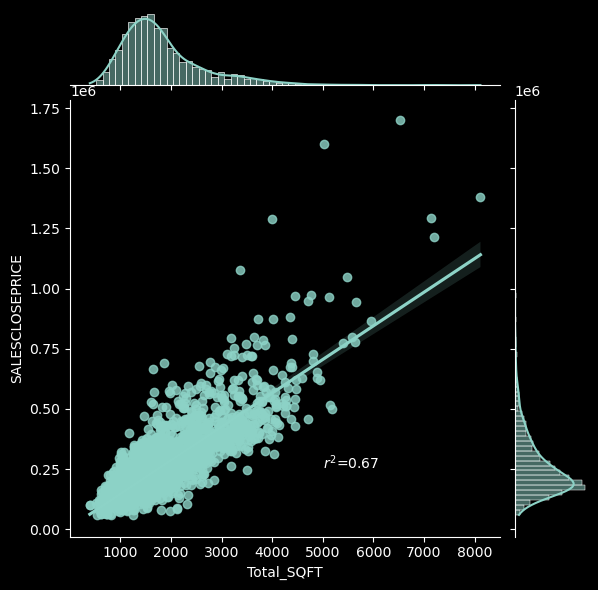

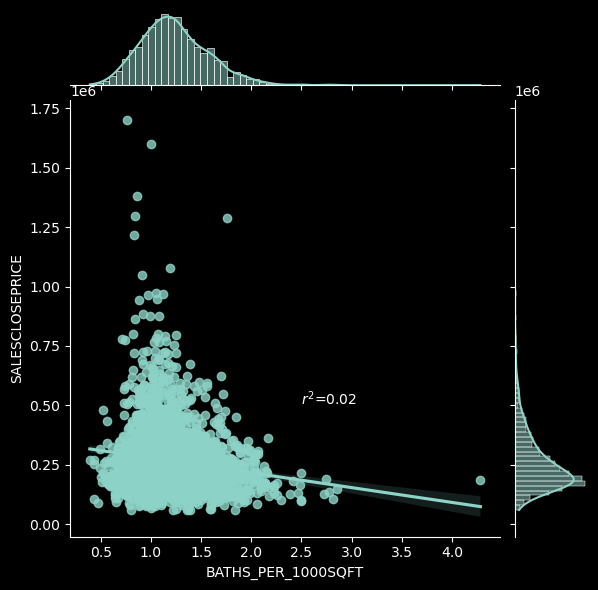

In [10]:
# Create new feature by adding two features together
df = df.withColumn('Total_SQFT', df['SQFTBELOWGROUND'] + df['SQFTABOVEGROUND'])

# Create additional new feature using previously created feature
df = df.withColumn('BATHS_PER_1000SQFT', df['BATHSTOTAL'] / (df['Total_SQFT'] / 1000))
df[['BATHS_PER_1000SQFT']].describe().show()

# Sample and create pandas dataframe
pandas_df = df.sample(False, 0.5, 0).toPandas()

import scipy.stats as stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

# Linear model plots
sns.jointplot(x='Total_SQFT', y='SALESCLOSEPRICE', data=pandas_df, kind="reg")
plt.text(5000, 0.25e6, f'$r^2$={r2(pandas_df.Total_SQFT, pandas_df.SALESCLOSEPRICE):.2f}', color='white')

# axes[1].set_title('Title of the first chart')
sns.jointplot(x='BATHS_PER_1000SQFT', y='SALESCLOSEPRICE', data=pandas_df, kind="reg")
plt.text(2.5, 0.5e6, f'$r^2$={r2(pandas_df.BATHS_PER_1000SQFT, pandas_df.SALESCLOSEPRICE):.2f}', color='white')
plt.show()

> Using the describe() function you could have seen there was a max of 1000 bathrooms per 1000sqft, which is almost for sure an issue with our data since no sane person would need a bathroom for square foot! If you really wanted to use this feature you'd have to filter that outlier out or overwrite it to NULL with when(). After plotting the jointplots()s you should have seen that the less complicated feature Total_SQFT had a much better R**2 of .67 vs BATHS_PER_1000SQFT's .02'. Often simplier is better!

# Time Features

## Treating Date Fields as Dates...

In [11]:
# Cast the data type to Date
df = df.withColumn('LISTDATE', F.to_date('LISTDATE'))
# Inspect the field
df[['LISTDATE']].show(2)

+----------+
|  LISTDATE|
+----------+
|2017-07-15|
|2017-10-09|
+----------+
only showing top 2 rows



## Time Components

In [12]:
# Create a new column of year number
df = df.withColumn('LIST_YEAR', F.year('LISTDATE'))
# Create a new column of month number
df = df.withColumn('LIST_MONTH', F.month('LISTDATE'))
# Create new columns of the day number within the month
df = df.withColumn('LIST_DAYOFMONTH', F.dayofmonth('LISTDATE'))
# Create new columns of the week number within the year
df = df.withColumn('LIST_WEEKOFYEAR', F.weekofyear('LISTDATE'))

## Basic Time Based Metrics

In [13]:
# Calculate difference between two date fields
df.select('OFFMARKETDATE', 'LISTDATE').withColumn('DAYSONMARKET', F.datediff('OFFMARKETDATE', 'LISTDATE')).show(3)

+-------------+----------+------------+
|OFFMARKETDATE|  LISTDATE|DAYSONMARKET|
+-------------+----------+------------+
|   2017-07-30|2017-07-15|          15|
|   2017-10-13|2017-10-09|           4|
|   2017-07-24|2017-06-26|          28|
+-------------+----------+------------+
only showing top 3 rows



## Lagging Features
window()
* Returns a record based off a group of records

lag(col, count=1)
* Return the value that is a offset by row before the current row

## Lagging Features, the PySpark Way

        from pyspark.sql.window import Window

        # Create Window
        w = Window().orderBy(m_df['DATE'])

        # Create lagged column
        m_df = m_df.withColumn('MORTGAGE-1wk', F.lag('MORTGAGE', count=1).over(w))

        # Inspect results
        m_df.show(3)

## Exercises

## Exercises

### Time Components

### Joining On Time Components

Often times you will use date components to join in other sets of information. However, in this example, we need to use data that would have been available to those considering buying a house. This means we will need to use the previous year's reporting data for our analysis.

        # Initialize dataframes
        df = real_estate_df
        price_df = median_prices_df

        # Create year column
        df = df.withColumn('list_year', F.year('LISTDATE'))

        # Adjust year to match
        df = df.withColumn('report_year', (df['list_year'] - 1))

        # Create join condition
        condition = [df['CITY'] == price_df['City'], df['report_year'] == price_df['Year']]

        # Join the dataframes together
        df = df.join(price_df, on=condition, how='left')
        # Inspect that new columns are available
        df[['MedianHomeValue']].show()

> You can see how easy it is to join data that is reported out at different intervals to use in your data. You also can see how easy it is to use data that would not have been available at the time of someone buying a home; a form of data leakage.

### Date Math

In this example, we'll look at verifying the frequency of our data. The Mortgage dataset is supposed to have weekly data but let's make sure by lagging the report date and then taking the difference of the dates.

    from pyspark.sql.window import Window

    # Cast data type
    mort_df = mort_df.withColumn('DATE', F.to_date('DATE'))

    # Create window
    w = Window().orderBy(mort_df['DATE'])
    # Create lag column
    mort_df = mort_df.withColumn('DATE-1', F.lag('DATE', count=1).over(w))

    # Calculate difference between date columns
    mort_df = mort_df.withColumn('Days_Between_Report', F.datediff('DATE', 'DATE-1'))
    # Print results
    mort_df.select('Days_Between_Report').distinct().show()

## Extracting Age boolean with Text Match

In [14]:
from pyspark.sql.functions import when
# Create boolean filters
find_under_8 = df['ROOF'].like('%Age 8 Years or Less%')
find_over_8 = df['ROOF'].like('%Age Over 8 Years%')
# Apply filters using when() and otherwise()
df = df.withColumn('old_roof',
                   F.when(find_over_8, True).when(find_under_8, False).otherwise(None))
                   #when(find_over_8, 1).when(find_under_8, 0).otherwise(None))
# Inspect results
df[['ROOF', 'old_roof']].show(truncate=100)

+----------------------------------------------+--------+
|                                          ROOF|old_roof|
+----------------------------------------------+--------+
|                                          null|    null|
|Asphalt Shingles, Pitched, Age 8 Years or Less|   false|
|                                          null|    null|
|Asphalt Shingles, Pitched, Age 8 Years or Less|   false|
|            Asphalt Shingles, Age Over 8 Years|    true|
|         Asphalt Shingles, Age 8 Years or Less|   false|
|         Asphalt Shingles, Age 8 Years or Less|   false|
|                              Asphalt Shingles|    null|
|                              Asphalt Shingles|    null|
|                              Asphalt Shingles|    null|
|                              Asphalt Shingles|    null|
|                              Asphalt Shingles|    null|
|                              Asphalt Shingles|    null|
|         Asphalt Shingles, Age 8 Years or Less|   false|
|             

## Splitting Columns and get the first item

In [15]:
# Split the column on commas into a list
split_col = F.split(df['ROOF'], ',')
# Put the first value of the list into a new column
df = df.withColumn('Roof_Material', split_col.getItem(0))
# Inspect results
df[['ROOF', 'Roof_Material']].show(truncate=100)

+----------------------------------------------+----------------+
|                                          ROOF|   Roof_Material|
+----------------------------------------------+----------------+
|                                          null|            null|
|Asphalt Shingles, Pitched, Age 8 Years or Less|Asphalt Shingles|
|                                          null|            null|
|Asphalt Shingles, Pitched, Age 8 Years or Less|Asphalt Shingles|
|            Asphalt Shingles, Age Over 8 Years|Asphalt Shingles|
|         Asphalt Shingles, Age 8 Years or Less|Asphalt Shingles|
|         Asphalt Shingles, Age 8 Years or Less|Asphalt Shingles|
|                              Asphalt Shingles|Asphalt Shingles|
|                              Asphalt Shingles|Asphalt Shingles|
|                              Asphalt Shingles|Asphalt Shingles|
|                              Asphalt Shingles|Asphalt Shingles|
|                              Asphalt Shingles|Asphalt Shingles|
|         

## Explode!
**Starting Record**

|NO|roof_list                                       |
|--|------------------------------------------------|
|2 |[Asphalt Shingles, Pitched, Age 8 Years or Less]|


**Exploded Record (more rows)**  
|NO| ex_roof_list   |
|--|----------------|
|2 |Asphalt Shingles|
|2 |Pitched         |
|2 |Age 8 Years or Less|

## Pivot!
**Exploded Record**
|NO| ex_roof_list|
|--|--|
|2 |Asphalt Shingles|
|2 |Pitched|
|2 | Age 8 Years or Less|

**Pivoted Record**
|NO|Age 8 Years or Less|Age Over 8 Years|Asphalt Shingles|Flat|Metal|Other|Pitched|...|
|--|-------------------|----------------|----------------|----|-----|-----|-------|---|
|2 |                  0|               1|               1| 0  | 0   |  0  |1      |...|

## Explode & Pivot!

In [16]:
# Split the column on commas into a list
df = df.withColumn('roof_list', F.split(df['ROOF'], ', '))
df[['ROOF', 'roof_list']].printSchema()
df[['ROOF', 'roof_list']].show(truncate=False)

root
 |-- ROOF: string (nullable = true)
 |-- roof_list: array (nullable = true)
 |    |-- element: string (containsNull = false)

+----------------------------------------------+------------------------------------------------+
|ROOF                                          |roof_list                                       |
+----------------------------------------------+------------------------------------------------+
|null                                          |null                                            |
|Asphalt Shingles, Pitched, Age 8 Years or Less|[Asphalt Shingles, Pitched, Age 8 Years or Less]|
|null                                          |null                                            |
|Asphalt Shingles, Pitched, Age 8 Years or Less|[Asphalt Shingles, Pitched, Age 8 Years or Less]|
|Asphalt Shingles, Age Over 8 Years            |[Asphalt Shingles, Age Over 8 Years]            |
|Asphalt Shingles, Age 8 Years or Less         |[Asphalt Shingles, Age 8 Years or Les

In [17]:
# Explode list into new records for each value
ex_df = df.withColumn('ex_roof_list', F.explode(df['roof_list']))
print(f'Before exploding: {df.count()}, {len(df.columns)}')
print(f'After exploding : {ex_df.count()}, {len(ex_df.columns)}')
ex_df[['ex_roof_list']].show()

Before exploding: 5000, 88
After exploding : 7498, 89
+-------------------+
|       ex_roof_list|
+-------------------+
|   Asphalt Shingles|
|            Pitched|
|Age 8 Years or Less|
|   Asphalt Shingles|
|            Pitched|
|Age 8 Years or Less|
|   Asphalt Shingles|
|   Age Over 8 Years|
|   Asphalt Shingles|
|Age 8 Years or Less|
|   Asphalt Shingles|
|Age 8 Years or Less|
|   Asphalt Shingles|
|   Asphalt Shingles|
|   Asphalt Shingles|
|   Asphalt Shingles|
|   Asphalt Shingles|
|   Asphalt Shingles|
|   Asphalt Shingles|
|Age 8 Years or Less|
+-------------------+
only showing top 20 rows



In [18]:
# Create a dummy column of constant value
ex_df = ex_df.withColumn('constant_val', F.lit(1))
# Pivot the values into boolean columns: coalesce(first(col)) takes the first non null col value
piv_df = ex_df.groupBy('NO').pivot('ex_roof_list')\
    .agg(F.coalesce(F.first('constant_val')))
piv_df.show()

+----+-------------------+----------------+----------------+----+-----+-----+-------+------+------+-----+----------+----+-------------------+-------------+
|  NO|Age 8 Years or Less|Age Over 8 Years|Asphalt Shingles|Flat|Metal|Other|Pitched|Rubber|Shakes|Slate|Tar/Gravel|Tile|Unspecified Shingle|Wood Shingles|
+----+-------------------+----------------+----------------+----+-----+-----+-------+------+------+-----+----------+----+-------------------+-------------+
|2509|               null|               1|               1|null| null| null|   null|  null|  null| null|      null|null|               null|         null|
|2250|               null|               1|               1|null| null| null|   null|  null|  null| null|      null|null|               null|         null|
|2927|                  1|            null|            null|null| null| null|   null|  null|  null| null|      null|null|               null|         null|
|1806|                  1|            null|               1|null

### Extracting Text to New Features

In [19]:
# Create boolean conditions for string matches
has_attached_garage = df['GARAGEDESCRIPTION'].like('%Attached Garage%')
has_detached_garage = df['GARAGEDESCRIPTION'].like('%Detached Garage%')

# Conditional value assignment 
df = df.withColumn('has_attached_garage', (F.when(has_attached_garage, 1)
                                          .when(has_detached_garage, 0)
                                          .otherwise(None)))

# Inspect results
df[['GARAGEDESCRIPTION', 'has_attached_garage']].sample(0.1, 3).show(truncate=100)

+-------------------------------------------------------------------------+-------------------+
|                                                        GARAGEDESCRIPTION|has_attached_garage|
+-------------------------------------------------------------------------+-------------------+
|                  Attached Garage, Driveway - Asphalt, Garage Door Opener|                  1|
|                    Attached Garage, Insulated Garage, Driveway - Asphalt|                  1|
|                                                          Attached Garage|                  1|
|                                      Attached Garage, Garage Door Opener|                  1|
|                                      Attached Garage, Driveway - Asphalt|                  1|
|                                                       Driveway - Asphalt|               null|
|                                                          Attached Garage|                  1|
|                  Attached Garage, Driv

### Splitting & Exploding

In [20]:
# Convert string to list-like array
df = df.withColumn('garage_list', F.split(df['GARAGEDESCRIPTION'], ', '))
print(df.count(), len(df.columns))
# Explode the values into new records
ex_df = df.withColumn('ex_garage_list', F.explode(df['garage_list']))
print(ex_df.count(), len(ex_df.columns))
# Inspect the values
ex_df[['ex_garage_list']].distinct().show(100, truncate=50)

5000 90
11209 91
+----------------------------+
|              ex_garage_list|
+----------------------------+
|             Attached Garage|
|      On-Street Parking Only|
|                        None|
| More Parking Onsite for Fee|
|          Garage Door Opener|
|   No Int Access to Dwelling|
|           Driveway - Gravel|
|       Valet Parking for Fee|
|              Uncovered/Open|
|               Heated Garage|
|          Underground Garage|
|                       Other|
|                  Unassigned|
|More Parking Offsite for Fee|
|    Driveway - Other Surface|
|       Contract Pkg Required|
|                     Carport|
|                     Secured|
|             Detached Garage|
|          Driveway - Asphalt|
|                  Units Vary|
|                    Assigned|
|                   Tuckunder|
|                     Covered|
|            Insulated Garage|
|         Driveway - Concrete|
|                      Tandem|
|           Driveway - Shared|
+---------------------

> Great, looking at the values, it looks like there is a decent amount of values here but not hundreds. If you have too many, when you pivot them it can make your dataset a mess.

### Pivot & Join

In [21]:
# Pivot 
ex_df = ex_df.withColumn('constant_val', F.lit(1))
piv_df = ex_df.groupBy('NO').pivot('ex_garage_list').agg(F.coalesce(F.first('constant_val')))
piv_df.printSchema()

root
 |-- NO: long (nullable = true)
 |-- Assigned: integer (nullable = true)
 |-- Attached Garage: integer (nullable = true)
 |-- Carport: integer (nullable = true)
 |-- Contract Pkg Required: integer (nullable = true)
 |-- Covered: integer (nullable = true)
 |-- Detached Garage: integer (nullable = true)
 |-- Driveway - Asphalt: integer (nullable = true)
 |-- Driveway - Concrete: integer (nullable = true)
 |-- Driveway - Gravel: integer (nullable = true)
 |-- Driveway - Other Surface: integer (nullable = true)
 |-- Driveway - Shared: integer (nullable = true)
 |-- Garage Door Opener: integer (nullable = true)
 |-- Heated Garage: integer (nullable = true)
 |-- Insulated Garage: integer (nullable = true)
 |-- More Parking Offsite for Fee: integer (nullable = true)
 |-- More Parking Onsite for Fee: integer (nullable = true)
 |-- No Int Access to Dwelling: integer (nullable = true)
 |-- None: integer (nullable = true)
 |-- On-Street Parking Only: integer (nullable = true)
 |-- Other: int

In [22]:
# Join the dataframes together and fill null
joined_df = df.join(piv_df, on='NO', how='left')
joined_df.printSchema()

root
 |-- NO: long (nullable = true)
 |-- MLSID: string (nullable = true)
 |-- STREETNUMBERNUMERIC: long (nullable = true)
 |-- STREETADDRESS: string (nullable = true)
 |-- STREETNAME: string (nullable = true)
 |-- POSTALCODE: long (nullable = true)
 |-- STATEORPROVINCE: string (nullable = true)
 |-- CITY: string (nullable = true)
 |-- SALESCLOSEPRICE: long (nullable = true)
 |-- LISTDATE: date (nullable = true)
 |-- LISTPRICE: long (nullable = true)
 |-- LISTTYPE: string (nullable = true)
 |-- ORIGINALLISTPRICE: long (nullable = true)
 |-- PRICEPERTSFT: double (nullable = true)
 |-- FOUNDATIONSIZE: long (nullable = true)
 |-- FENCE: string (nullable = true)
 |-- MAPLETTER: string (nullable = true)
 |-- LOTSIZEDIMENSIONS: string (nullable = true)
 |-- SCHOOLDISTRICTNUMBER: string (nullable = true)
 |-- DAYSONMARKET: long (nullable = true)
 |-- OFFMARKETDATE: date (nullable = true)
 |-- FIREPLACES: long (nullable = true)
 |-- ROOMAREA4: string (nullable = true)
 |-- ROOMTYPE: string (nu

In [23]:
# Columns to zero fill
zfill_cols = piv_df.columns
# Zero fill the pivoted values
zfilled_df = joined_df.fillna(0, subset=zfill_cols)

## Exercises

### Binarizing

Binarization of data is a is a helpful way to collapse some nuance in your model to just a yes/no.

In [24]:
from pyspark.ml.feature import Binarizer
# Cast the data type to double
df = df.withColumn('FIREPLACES', df['FIREPLACES'].cast('double'))
# Create binarizing transformer
bin = Binarizer(threshold=0.0, inputCol='FIREPLACES', outputCol='FireplaceT')
# Apply the transformer
df = bin.transform(df)
# Inspect the results
df[['FIREPLACES','FireplaceT']].show(5)

+----------+----------+
|FIREPLACES|FireplaceT|
+----------+----------+
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       1.0|       1.0|
|       1.0|       1.0|
+----------+----------+
only showing top 5 rows



### Bucketing

Then we need to define our splits for buckets of values. We want 0 to 1, mapped to 1, greater than 1 to 2, mapped to 2, greater 2 to 3, mapped to 3 and lastly anything more than 4 to mapped to 4 by using the infinity value float INF for the upper bound.

In [25]:
from pyspark.ml.feature import Bucketizer
# Define how to split data
splits = [0, 1, 2, 3, 4, float('Inf')]
# Create bucketing transformer
buck = Bucketizer(splits=splits, inputCol='BATHSTOTAL', outputCol='baths')
# Apply transformer
df = buck.transform(df)
# Inspect results
df[['BATHSTOTAL', 'baths']].show(3)

+----------+-----+
|BATHSTOTAL|baths|
+----------+-----+
|         2|  2.0|
|         3|  3.0|
|         1|  1.0|
+----------+-----+
only showing top 3 rows



## One Hot Encoding the PySpark Way

In [26]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer
# Create indexer transformer
stringIndexer = StringIndexer(inputCol='CITY', outputCol='City_Index')
# Fit transformer
model = stringIndexer.fit(df)
# Apply transformer
indexed = model.transform(df)

> Now we can apply the OneHotEncoder transformer on our indexed city values and output all the encoded indexes to a single column of type vector which is more efficient than storing them all individual columns. Another thing to note is that the last category is not included by default because it is linearly dependent on the other columns and not is needed. 

In [27]:
# Create encoder transformer
encoder = OneHotEncoder(inputCol='City_Index', outputCol='City_Vec')
# Apply the encoder transformer
model = encoder.fit(indexed)
encoded_df = model.transform(indexed)
# Inspect results
encoded_df[['City_Index', 'City_Vec']].sample(0.01, 1).show(3)
encoded_df.groupBy('City_Vec').count().show()

+----------+-------------+
|City_Index|     City_Vec|
+----------+-------------+
|       4.0|    (4,[],[])|
|       4.0|    (4,[],[])|
|       2.0|(4,[2],[1.0])|
+----------+-------------+
only showing top 3 rows

+-------------+-----+
|     City_Vec|count|
+-------------+-----+
|(4,[2],[1.0])|  473|
|(4,[0],[1.0])| 2825|
|    (4,[],[])|  155|
|(4,[3],[1.0])|  400|
|(4,[1],[1.0])| 1147|
+-------------+-----+



## Exercises

### Binarizing Day of Week

In [28]:
# Cast the data type to double
df = df.withColumn('List_Day_of_Week', F.dayofweek(df['LISTDATE']))
df[['LISTDATE','List_Day_of_Week']].show(5)

+----------+----------------+
|  LISTDATE|List_Day_of_Week|
+----------+----------------+
|2017-07-15|               7|
|2017-10-09|               2|
|2017-06-26|               2|
|2017-08-25|               6|
|2017-09-12|               3|
+----------+----------------+
only showing top 5 rows



In [29]:
# # Only Binarize floats
df = df.withColumn('List_Day_of_Week', df['List_Day_of_Week'].cast('double'))
# Import transformer
from pyspark.ml.feature import Binarizer
# Create the transformer
binarizer = Binarizer(threshold=5, inputCol='List_Day_of_Week', outputCol='Listed_On_Weekend')
# Apply the transformation to df
df = binarizer.transform(df)
# Verify transformation
df[['List_Day_of_Week', 'Listed_On_Weekend']].show()

+----------------+-----------------+
|List_Day_of_Week|Listed_On_Weekend|
+----------------+-----------------+
|             7.0|              1.0|
|             2.0|              0.0|
|             2.0|              0.0|
|             6.0|              1.0|
|             3.0|              0.0|
|             2.0|              0.0|
|             5.0|              0.0|
|             1.0|              0.0|
|             5.0|              0.0|
|             7.0|              1.0|
|             6.0|              1.0|
|             5.0|              0.0|
|             1.0|              0.0|
|             2.0|              0.0|
|             5.0|              0.0|
|             1.0|              0.0|
|             1.0|              0.0|
|             6.0|              1.0|
|             7.0|              1.0|
|             6.0|              1.0|
+----------------+-----------------+
only showing top 20 rows



### Bucketing

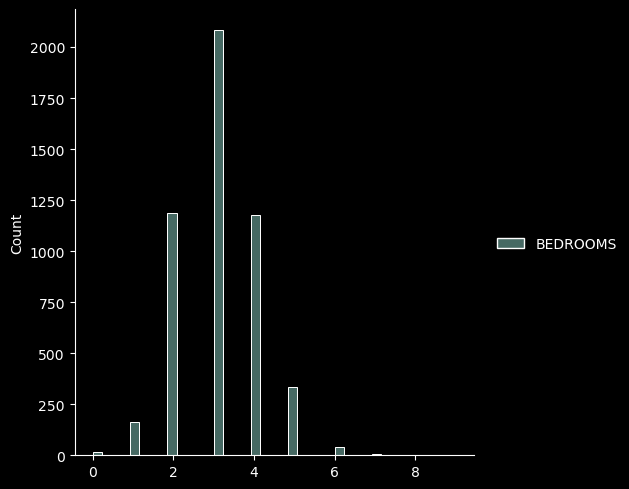

In [30]:
from pyspark.ml.feature import Bucketizer

sample_df = df[['BEDROOMS']].toPandas()
# Plot distribution of sample_df
sns.displot(sample_df, label='BEDROOMS')
plt.show()

In [31]:
# Create the bucket splits and bucketizer
splits = [0, 1, 2, 3, 4, 5, float('Inf')]
buck = Bucketizer(splits=splits, inputCol='BEDROOMS', outputCol='bedrooms')
# Apply the transformation to df: df_bucket
df_bucket = buck.transform(df)
# Display results
df.groupBy('BEDROOMS').count().show()
df_bucket.groupBy('bedrooms').count().show()

+--------+-----+
|BEDROOMS|count|
+--------+-----+
|       0|   14|
|       7|    4|
|       6|   40|
|       9|    1|
|       5|  333|
|       1|  162|
|       3| 2082|
|       8|    1|
|       2| 1185|
|       4| 1178|
+--------+-----+

+--------+-----+
|bedrooms|count|
+--------+-----+
|     0.0|   14|
|     1.0|  162|
|     4.0| 1178|
|     3.0| 2082|
|     2.0| 1185|
|     5.0|  379|
+--------+-----+



### One Hot Encoding

In [32]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer

# Map strings to numbers with string indexer
string_indexer = StringIndexer(inputCol='SCHOOLDISTRICTNUMBER', outputCol='School_Index')
indexed_df = string_indexer.fit(df).transform(df)

# Onehot encode indexed values
encoder = OneHotEncoder(inputCol='School_Index', outputCol='School_Vec')
encoded_df = encoder.fit(indexed_df).transform(indexed_df)

# Inspect the transformation steps
encoded_df[['SCHOOLDISTRICTNUMBER', 'School_Index', 'School_Vec']].show(truncate=100)

+-----------------------------+------------+-------------+
|         SCHOOLDISTRICTNUMBER|School_Index|   School_Vec|
+-----------------------------+------------+-------------+
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|622 - North St Paul-Maplewood|         1.0|(7,[1],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|622 - North St Paul-Maplewood|         1.0|(7,[1],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0]

> One Hot Encoding is a great way to handle categorial variables. You may have noticed that **the implementation in PySpark is different than Pandas get_dummies() as it puts everything into a single column of type vector rather than a new column for each value**. It's **also different from sklearn's OneHotEncoder in that the last categorical value is captured by a vector of all zeros.**

In [33]:
len(df.columns)

94